# Project 1 

## Task 5

### Star Cluster

### For this task, calculate the average retrieved absolute magnitude considering the whole
### synthetic sample, and compare it with the true absolute magnitude. Is there a difference? By
### how much? How does this difference compare with the bias found for the samples of stars in
### the distance ranges between 2 and 3 kpc, and between 3 and 4 kpc in tasks 1, 2 and 3, where
### the adopted parallax errors are the same as for this task? Explain the outcome of this
### comparison.

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_fwf('LK_Task_5.dat', widths = [13, 9, 8, 12, 12, 14, 9, 9, 9], 
               names = ['true parallax (arcsec)', 'true distance (pc)', 'apparent magnitude', 
                        'observed parallax (arcsec)', 'parallax error (arcsec)', 'retrieved distance from observed parallax (pc)',
                        'true absolute magnitude', 'retrieved absolute magnitude', 'photometric error (mag)'
                       ], skiprows = 13)

print (df)

       true parallax (arcsec)  true distance (pc)  apparent magnitude  \
0                    0.000333              3000.3              12.986   
1                    0.000330              3031.6              13.008   
2                    0.000332              3015.2              12.995   
3                    0.000331              3016.7              12.998   
4                    0.000331              3022.2              13.001   
...                       ...                 ...                 ...   
99995                0.000332              3010.4              12.992   
99996                0.000331              3023.8              13.003   
99997                0.000331              3017.7              12.999   
99998                0.000333              3003.1              12.989   
99999                0.000333              3004.8              12.990   

       observed parallax (arcsec)  parallax error (arcsec)  \
0                        0.000386                  0.00005   

In [7]:
print ("Mean retrieved absolute magnitude of stars in the sample = %#.3g" % df['retrieved absolute magnitude'].mean())
print ("Dispersion of retrieved absolute magnitude = %#.3g" % df['retrieved absolute magnitude'].std())

Mean retrieved absolute magnitude of stars in the sample = 0.575
Dispersion of retrieved absolute magnitude = 0.339


In [6]:
print ("Mean true absolute magnitude of stars = %#.3g" % df['true absolute magnitude'].mean())

Mean true absolute magnitude of stars = 0.600


In [10]:
df_r2001_3000 = df[(df['retrieved distance from observed parallax (pc)'] > 2000) & 
                   (df['retrieved distance from observed parallax (pc)'] <= 3000)
                  ]
df_r3001_4000 = df[(df['retrieved distance from observed parallax (pc)'] > 3000)  & 
                   (df['retrieved distance from observed parallax (pc)'] <= 4000)
                  ]

raw_data = {
            'RAM Mean':[
                        df_r2001_3000['retrieved absolute magnitude'].mean(),
                        df_r3001_4000['retrieved absolute magnitude'].mean()
                       ],
                        
            'RAM Dispersion':[
                        df_r2001_3000['retrieved absolute magnitude'].std(),
                        df_r3001_4000['retrieved absolute magnitude'].std()
                        ],
    
            'TAM Mean':[      
                        df_r2001_3000['true absolute magnitude'].mean(),     
                        df_r3001_4000['true absolute magnitude'].mean()
                        ],
                          
      'TAM Dispersion':[             
                        df_r2001_3000['true absolute magnitude'].std(),
                        df_r3001_4000['true absolute magnitude'].std()
                        ]
}

df_data = pd.DataFrame(raw_data,
                  index=pd.Index(['2001-3000pc', '3001-4000pc'], name='Retrieved Distance'),
                  columns=pd.Index(['RAM Mean', 'RAM Dispersion', 'TAM Mean', 'TAM Dispersion'], name=''))



df_data

,RAM Mean,RAM Dispersion,TAM Mean,TAM Dispersion
Retrieved Distance,,,,
2001-3000pc,0.849001,0.167759,0.600005,0.001041
3001-4000pc,0.377936,0.164470,0.599990,0.001043


0        3000.3
1        3031.6
2        3015.2
3        3016.7
4        3022.2
          ...  
99995    3010.4
99996    3023.8
99997    3017.7
99998    3003.1
99999    3004.8
Name: true distance (pc), Length: 100000, dtype: float64


<Figure size 432x288 with 0 Axes>

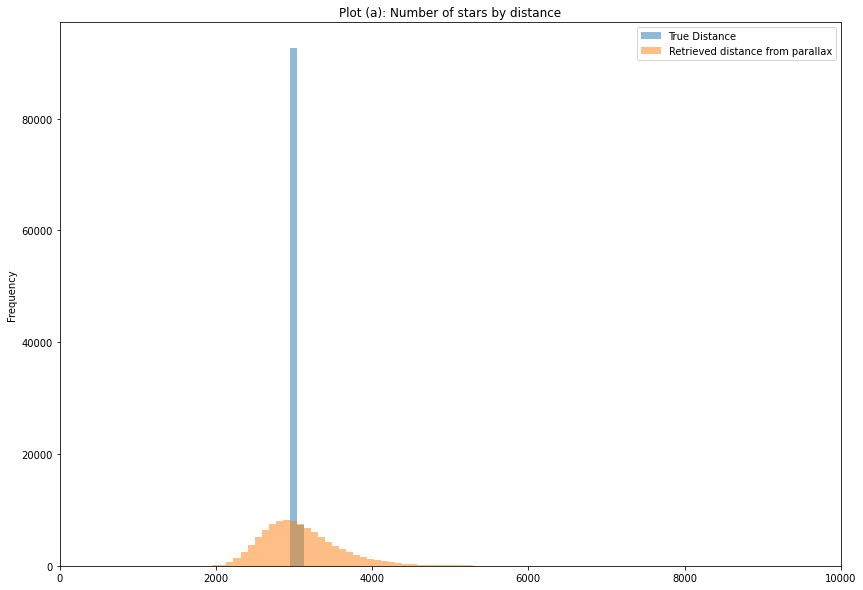

<Figure size 432x288 with 0 Axes>

In [16]:
df_col_2 = df["true distance (pc)"]

df_col_6 = df["retrieved distance from observed parallax (pc)"]

print (df_col_2)
#print(df_within4kpc["true distance (pc)"])

df_hist = pd.DataFrame({'True Distance': df_col_2, 'Retrieved distance from parallax': df_col_6})
#df_hist = pd.DataFrame({'True Distance': (float64)df_within4kpc["true distance (pc)"]})
df_hist.plot(kind='hist', alpha=0.5, bins=70, figsize=(14,10), title="Plot (a): Number of stars by distance")
plt.xlim([0,10000])
#plt.ylim([0,7000])
plt.figure()

<Figure size 432x288 with 0 Axes>

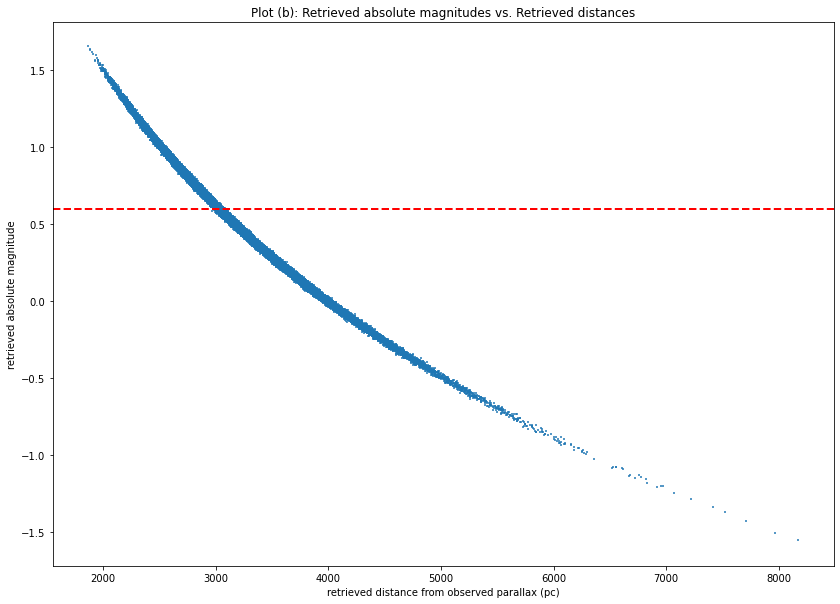

<Figure size 432x288 with 0 Axes>

In [18]:

df.plot.scatter(x='retrieved distance from observed parallax (pc)', y="retrieved absolute magnitude"
                          , figsize=(14,10), marker=(1, 2), title="Plot (b): Retrieved absolute magnitudes vs. Retrieved distances")

plt.axhline(y=0.6, color='r', linestyle='dashed', linewidth=2)

plt.figure()

<Figure size 432x288 with 0 Axes>

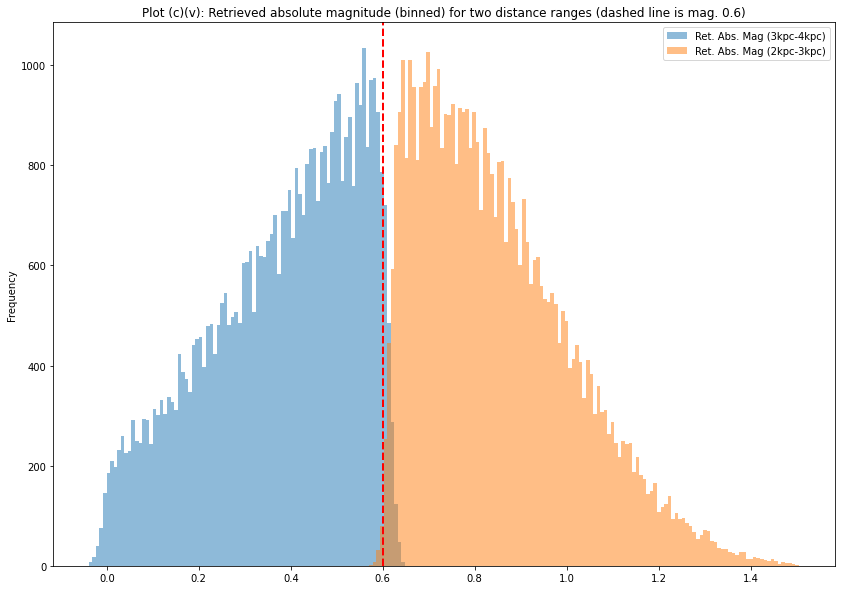

<Figure size 432x288 with 0 Axes>

In [22]:
df_hist = pd.DataFrame({
                        'Ret. Abs. Mag (3kpc-4kpc)': df_r3001_4000['retrieved absolute magnitude'],
                        'Ret. Abs. Mag (2kpc-3kpc)': df_r2001_3000['retrieved absolute magnitude']
                       })
df_hist.plot(kind='hist', alpha=0.5, bins=200, figsize=(14,10), legend=True, 
             title="Plot (c)(v): Retrieved absolute magnitude (binned) for two distance ranges (dashed line is mag. 0.6)")
plt.axvline(x=0.6, color='r', linestyle='dashed', linewidth=2)
#plt.xlim([0,10000])
#plt.ylim([0,7000])
plt.figure()

<Figure size 432x288 with 0 Axes>

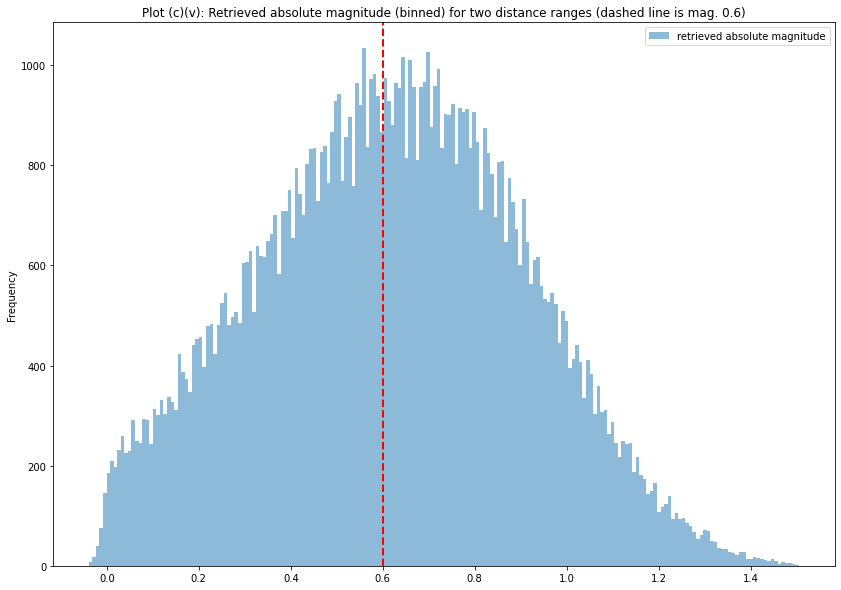

<Figure size 432x288 with 0 Axes>

In [24]:
df_r2001_4000 = df[(df['retrieved distance from observed parallax (pc)'] > 2000) & 
                   (df['retrieved distance from observed parallax (pc)'] <= 4000)
                  ]

#df_hist = pd.DataFrame({
#                        'Ret. Abs. Mag (3kpc-4kpc)': df_r3001_4000['retrieved absolute magnitude'],
#                        'Ret. Abs. Mag (2kpc-3kpc)': df_r2001_3000['retrieved absolute magnitude']
#                       })
#df_hist.plot(kind='hist', alpha=0.5, bins=200, figsize=(14,10), legend=True, 
#             title="Plot (c)(v): Retrieved absolute magnitude (binned) for two distance ranges (dashed line is mag. 0.6)")

df_r2001_4000['retrieved absolute magnitude'].plot(kind='hist', alpha=0.5, bins=200, figsize=(14,10), legend=True, 
             title="Plot (c)(v): Retrieved absolute magnitude (binned) for two distance ranges (dashed line is mag. 0.6)")

plt.axvline(x=0.6, color='r', linestyle='dashed', linewidth=2)
#plt.xlim([0,10000])
#plt.ylim([0,7000])
plt.figure()